# 1.What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a simple algorithm used for classification and regression based on the K closest data points to a query point.

# 2.What is the difference between KNN Classification and KNN Regression?

KNN Classification assigns the majority class label among neighbors, whereas KNN Regression predicts a continuous output by averaging the neighbor values.

# 3. What is the role of the distance metric in KNN?

The distance metric, such as Euclidean or Manhattan distance, determines how "closeness" is measured and directly impacts neighbor identification.

# 4.What is the Curse of Dimensionality in KNN?

The Curse of Dimensionality refers to the sparsity of data in high-dimensional spaces, which hinders effective neighbor searches.

# 5. How can we choose the best value of K in KNN?

The best value of K can be chosen through cross-validation by evaluating model performance across various K values.

# 6. What are KD Tree and Ball Tree in KNN?

KD Tree and Ball Tree are efficient data structures used to speed up nearest neighbor searches in high-dimensional spaces.

# 7. When should you use KD Tree vs. Ball Tree?

Use KD Tree for low to moderate dimensions and Ball Tree for higher-dimensional data or non-uniform data distributions.

# 8. What are the disadvantages of KNN?

Disadvantages of KNN include computational inefficiency with large datasets, sensitivity to irrelevant features, and reliance on feature scaling.

# 9. How does feature scaling affect KNN?

Feature scaling is essential for KNN as it ensures that all features contribute equally to the distance calculations.

# 10. How does KNN handle missing values in a dataset?

KNN does not handle missing values inherently; common approaches include removing instances or using imputation techniques before application.

# 11. What is PCA (Principal Component Analysis)?

PCA is a dimensionality reduction technique that transforms the data into a new coordinate system to retain maximum variance.

# 12. How does PCA work?

PCA works by standardizing data, computing a covariance matrix, deriving eigenvalues and eigenvectors, and selecting principal components.

# 13. What is the geometric intuition behind PCA?

Geometrically, PCA projects data onto axes (principal components) that maximize variance and are orthogonal to each other.

# 14. What is the difference between Feature Selection and Feature Extraction?

Feature Selection involves choosing existing features, while Feature Extraction creates new features through transformations like PCA

# 15. What are Eigenvalues and Eigenvectors in PCA?

Eigenvalues represent the amount of variance explained by principal components, while eigenvectors define their directions in the feature space.

# 16. How do you decide the number of components to keep in PCA?

The number of components to keep is often determined using the explained variance ratio or by finding the "elbow point" in a variance plot.

# 17. Can PCA be used for classification?

PCA can be used as a preprocessing step for classification algorithms to reduce dimensionality and improve efficiency.

# 18.What are the limitations of PCA?

Limitations of PCA include its assumption of linearity, sensitivity to outliers, and potential lack of interpretability in the transformed features.

# 19. How do KNN and PCA complement each other?

PCA and KNN complement each other by reducing dimensionality to enhance KNN’s performance and mitigate the curse of dimensionality.

# 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

PCA is an unsupervised technique focused on maximizing variance, while LDA is a supervised technique that seeks to maximize class separation.

# --------------------------- Practical ----------------------------------

# 1. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


# 2. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [2]:
# Euclidean distance
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_euclidean.fit(X_train, y_train)
accuracy_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))

# Manhattan distance
knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_manhattan.fit(X_train, y_train)
accuracy_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))

print("Accuracy with Euclidean distance:", accuracy_euclidean)
print("Accuracy with Manhattan distance:", accuracy_manhattan)

Accuracy with Euclidean distance: 1.0
Accuracy with Manhattan distance: 1.0


# 3. Train a KNN Classifier with different values of K and visualize decision boundaries.

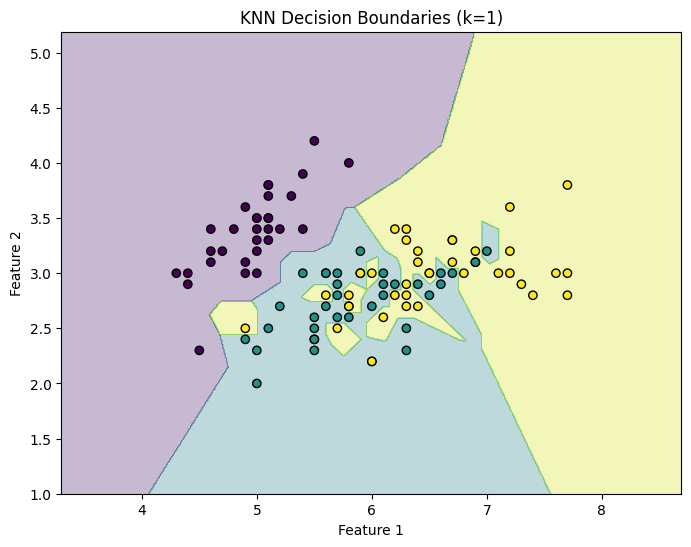

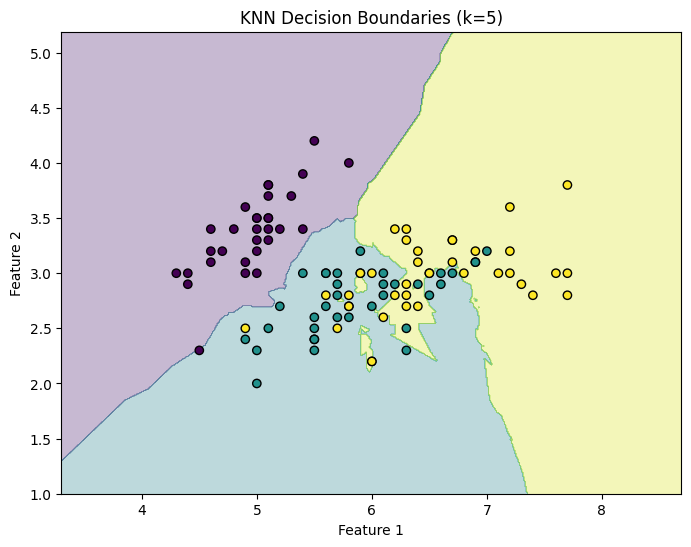

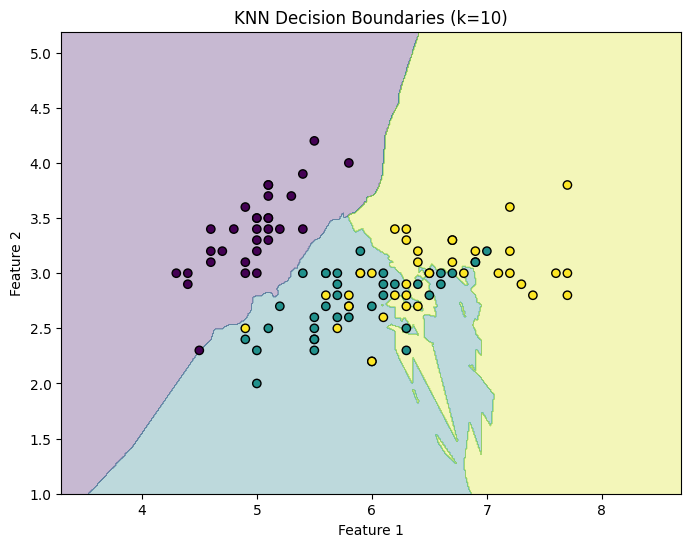

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset and prepare data
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"KNN Decision Boundaries (k={model.n_neighbors})")
    plt.show()

# Try different k values
k_values = [1, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundaries(X_train, y_train, knn)


# 4. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Without Scaling
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
accuracy_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", accuracy_unscaled)
print("Accuracy with scaling:", accuracy_scaled)

Accuracy without scaling: 0.8
Accuracy with scaling: 0.8222222222222222


# 5. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Best cross-validation score: 0.7904761904761906


# 6. Train a KNN Classifier and check the number of misclassified samples.

In [7]:
y_pred = knn.predict(X_test)
misclassified_samples = (y_test != y_pred).sum()
print("Number of misclassified samples:", misclassified_samples)

Number of misclassified samples: 11


# 7. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [8]:
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
accuracy_kd = accuracy_score(y_test, knn_kd.predict(X_test))

knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
accuracy_ball = accuracy_score(y_test, knn_ball.predict(X_test))

print("Accuracy with KD Tree:", accuracy_kd)
print("Accuracy with Ball Tree:", accuracy_ball)

Accuracy with KD Tree: 0.8
Accuracy with Ball Tree: 0.8


# 8. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.57      0.62      0.59        13
           2       0.58      0.54      0.56        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



# 9. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [10]:
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train, y_train)
accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train, y_train)
accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print("Accuracy with uniform weights:", accuracy_uniform)
print("Accuracy with distance weights:", accuracy_distance)

Accuracy with uniform weights: 0.8
Accuracy with distance weights: 0.7555555555555555


# 10. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

In [11]:
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

knn_wine = KNeighborsClassifier()
knn_wine.fit(X_train_wine, y_train_wine)

y_pred_wine = knn_wine.predict(X_test_wine)
print(classification_report(y_test_wine, y_pred_wine))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



# 11. Train a KNN Regressor and analyze the effect of different K values on performance.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Create synthetic dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Evaluate KNN regressor with different k values
k_values_reg = [1, 3, 5]
for k in k_values_reg:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    mse = mean_squared_error(y_test_reg, knn_reg.predict(X_test_reg))
    print(f"MSE for K={k}:", mse)


MSE for K=1: 1.3483202745887781
MSE for K=3: 2.31037430158305
MSE for K=5: 2.5881038103118676


# 12. Implement KNN Imputation for handling missing values in a dataset.

In [14]:
from sklearn.impute import KNNImputer
import numpy as np

# Create synthetic data with missing values
X_missing = np.array([[1, 2], [np.nan, 3], [7, 6], [np.nan, np.nan]])
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)

print("Original data with missing values:\n", X_missing)
print("Imputed data:\n", X_imputed)


Original data with missing values:
 [[ 1.  2.]
 [nan  3.]
 [ 7.  6.]
 [nan nan]]
Imputed data:
 [[1.         2.        ]
 [4.         3.        ]
 [7.         6.        ]
 [4.         3.66666667]]


# 13. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_reg)  # Use synthetic regression dataset
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.]


# 14. Train a PCA model and visualize the cumulative explained variance.

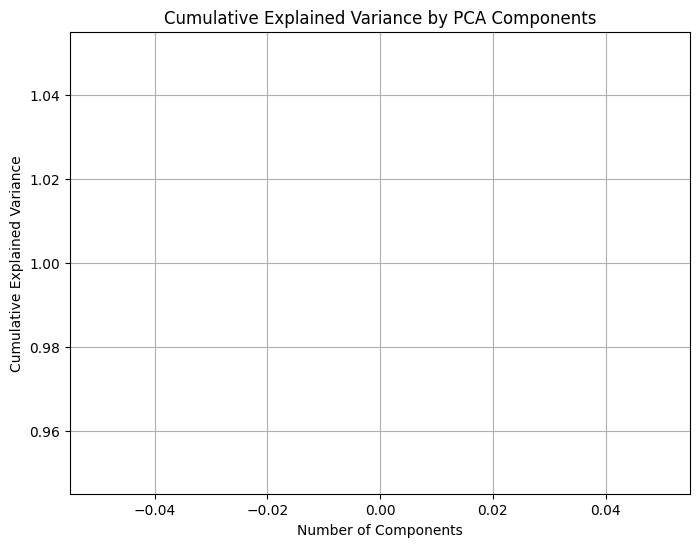

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# 15. Train a PCA model and visualize the data projection onto the first two principal components.

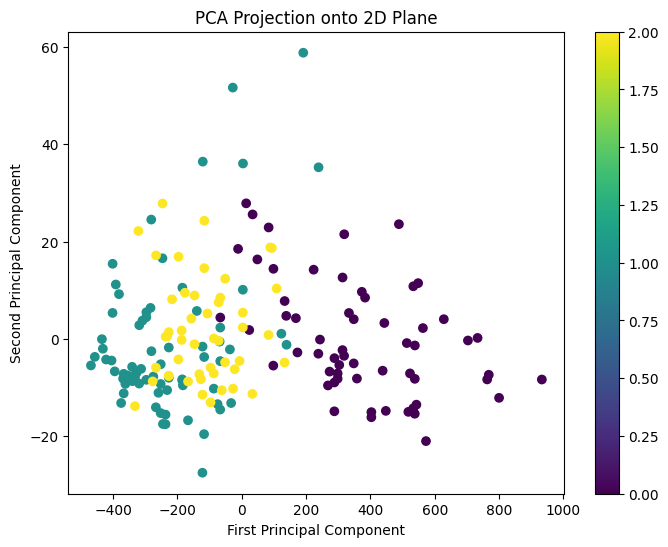

In [17]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_wine)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection onto 2D Plane')
plt.colorbar()
plt.show()

# 16. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

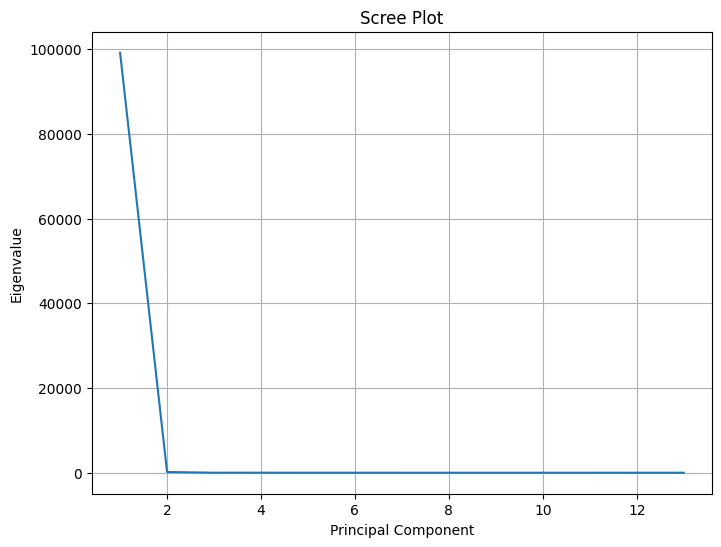

In [18]:
pca_high_dim = PCA()
pca_high_dim.fit(X_wine)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_high_dim.explained_variance_) + 1), pca_high_dim.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

# 17. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [19]:
# Without PCA
knn_wine.fit(X_train_wine, y_train_wine)
accuracy_without_pca = accuracy_score(y_test_wine, knn_wine.predict(X_test_wine))

# With PCA
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_train_wine)

knn_wine.fit(X_wine_pca, y_train_wine)
X_test_wine_pca = pca_wine.transform(X_test_wine)
accuracy_with_pca = accuracy_score(y_test_wine, knn_wine.predict(X_test_wine_pca))

print("Accuracy without PCA:", accuracy_without_pca)
print("Accuracy with PCA:", accuracy_with_pca)

Accuracy without PCA: 0.7222222222222222
Accuracy with PCA: 0.7222222222222222


# 18. Train a PCA model and analyze the effect of different numbers of components on accuracy.

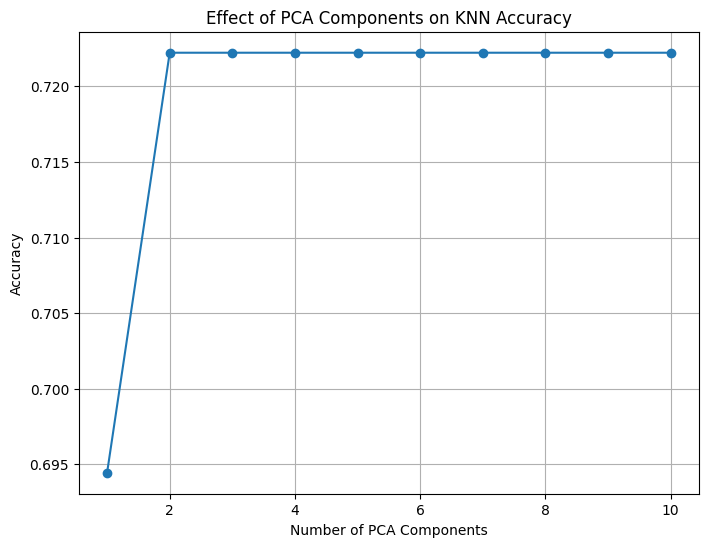

In [20]:
components = range(1, 11)
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_wine_pca = pca.fit_transform(X_train_wine)
    knn_wine.fit(X_wine_pca, y_train_wine)
    X_test_wine_pca = pca.transform(X_test_wine)
    accuracy = accuracy_score(y_test_wine, knn_wine.predict(X_test_wine_pca))
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Effect of PCA Components on KNN Accuracy')
plt.grid()
plt.show()

# 19. Train a KNN Classifier with different leaf_size values and compare accuracy.

In [21]:
leaf_sizes = [20, 30, 40]
for leaf_size in leaf_sizes:
    knn_custom_leaf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=leaf_size)
    knn_custom_leaf.fit(X_train, y_train)
    accuracy_large_leaf = accuracy_score(y_test, knn_custom_leaf.predict(X_test))
    print(f"Accuracy with leaf size {leaf_size}:", accuracy_large_leaf)

Accuracy with leaf size 20: 0.8
Accuracy with leaf size 30: 0.8
Accuracy with leaf size 40: 0.8


# 20. Train a PCA model and visualize how data points are transformed before and after PCA.

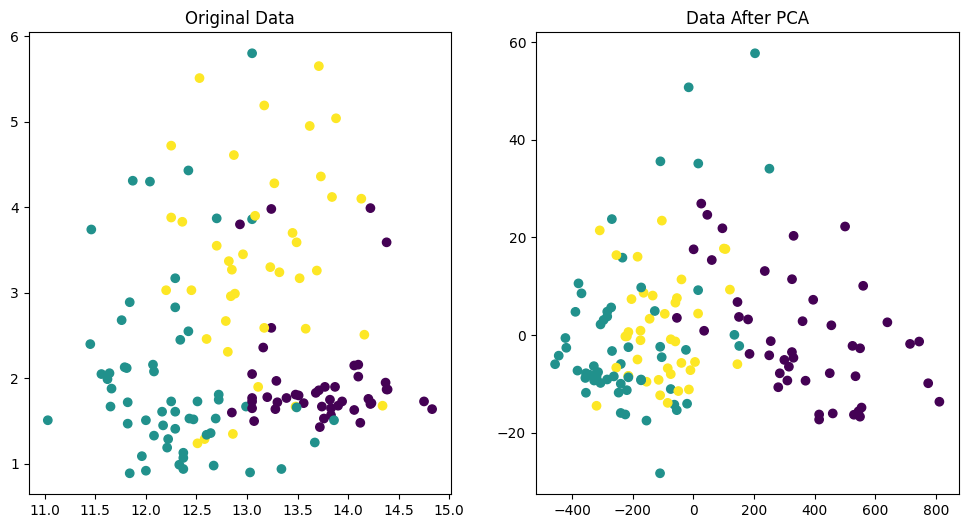

In [22]:
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_train_wine)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_wine[:, 0], X_train_wine[:, 1], c=y_train_wine, cmap='viridis')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_train_wine, cmap='viridis')
plt.title('Data After PCA')
plt.show()

# 21. Train a KNN Classifier and evaluate performance using ROC-AUC score.

In [23]:
from sklearn.metrics import roc_auc_score

# Use only two classes for ROC-AUC
y_bin = (y_wine == 0).astype(int)  # Binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_wine, y_bin, test_size=0.2, random_state=42)

knn_classifier_bin = KNeighborsClassifier()
knn_classifier_bin.fit(X_train_bin, y_train_bin)
y_probs = knn_classifier_bin.predict_proba(X_test_bin)[:, 1]
roc_auc = roc_auc_score(y_test_bin, y_probs)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.9707792207792207
